In [15]:
# Libreria tensor flow
import tensorflow as tf
# Daset de datos con números escritos a manorom 
from tensorflow.examples.tutorials.mnist import input_data
# API de tensorfow para construir y entrenar modelos de alto nivel
from tensorflow import keras
from keras.utils.np_utils import to_categorical
# Librería para representación gráfica
import matplotlib.pyplot as plt
# Librería para tratar arrays
import numpy as np


In [19]:
# Se recuperan los datos y el metadata de los datos
#mnist_train2, mnist_info = tfds.load('mnist', split='train', as_supervised=True,  shuffle_files=True,with_info=True)
# De los datos, se extrae los datos de entrenamiento y test
mnist = tf.keras.datasets.mnist
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()
x_train = x_train_orig.reshape(x_train.shape[0], 784)
x_test = x_test_orig.reshape(x_test.shape[0], 784)

# El formato original esta en "unit8" con lo que se tiene que convertir en un float32 para que funcione
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Se divide la imagen en 255 porque es la escala de grises y es mejor operar con 0 y 1. Más sencillo
x_train, x_test = x_train / 255.0, x_test / 255.0

# Paso necesario porque devuelve los registros y toda la información en la misma columna. Pero 
# se necesita esos valores esten en un matriz de 10 columnas para calcular bien los acietros.
y_train = to_categorical(y_train_orig, 10)
y_test = to_categorical(y_test_orig, 10)


In [4]:
# El modelo keras se basa en capas donde vas añadiendolas para 
# ir construyendo la red neuronal
model = tf.keras.Sequential()
# La función sigmoid es la que hace el calculo de peso. Haría primero:
# 1. y = tf.matmul(x,P)+b en la versión que no funciona 
# 2. Luego devolvería 0 o 1 según se acerque al valor. Que sería, creo, calcular el gradiente
# descendiente. Es por ello que los datos de entrada se 
# dividen entre 255 para obtener un valor entre 0 y 1.
model.add(tf.keras.layers.Dense(10,activation='sigmoid', input_shape=(784,)))
# Esta función es la que se encarga de calcular la probabilidad que 
# el resultado devuelto en el paso anterior a que número pertenzca. Por eso
# la red neuronal tiene 10 columnas, y las etiquetas del set de datos
# se han convertido a 10.
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [5]:
# Este paso es opcional y permite ver los parámetros de cada capa que se añade
# La primera es que se usa para el calculo de pesos y la gradiente descendiente
# y tiene 7850. Que son 784 de la entrada de datos(28x28)*10(número de neuronas de entrada)
# + 10 sesgo.
# La segunda capa son 10 neuronas de salida *10 del paso anterior + 10 del sesgo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Este es el paso de configuración del aprendizaje del modelo
# El parámetro "loss" es que la algoritmo/proceso de calculo en el softmax. 
# En el parámetro "optimizer" es el algoritmo que se usa para el calculo de peso y el gradiente descendiente
# El parámetro "metrics" sirve para monitorizar el proceso de entrenamiento. Hay varias metricas que se puede usar
# pero en el ejemplo solo usa esta.
model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics = ['accuracy'])

In [8]:
# Ahora toca entrenar el modelo. Se le pasan los datos de entrenamiento y sus etiquetas
# El nuúmero de "epochs" es la veces que se va entrenar el algoritmo
# Hay un parámetro que no esta que es el batch_size que indica cuantos datos se van a usar 
# para calcular los parámetro del modelo(los pesos)
# El parámetro verbose es para indicar si nos va dar salida de los pasos que va haciendo
# 0 = no sale nada. 1 barra de progreso. 2 una linea por epoch
model.fit(x_train, y_train, epochs=10, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4398 - accuracy: 0.8895
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4233 - accuracy: 0.8927
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4094 - accuracy: 0.8955
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3973 - accuracy: 0.8973
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3868 - accuracy: 0.8996
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3774 - accuracy: 0.9018
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3691 - accuracy: 0.9037
Epoch 8/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3615 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3548 - accuracy: 0.9060
Epoch 10/10
60

In [9]:
# Evaluar el modelo a partir de los datos de test.
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3391 - accuracy: 0.9099


In [11]:
# En el paso anterior devolverá el % de acierto porque al modelo le hemos indicado
# que muestre el progreso que va haciendo. Pero también se puede saber 
# mostrando el resultado de la variable
print("% de acierto", test_acc)

% de acierto 0.9099


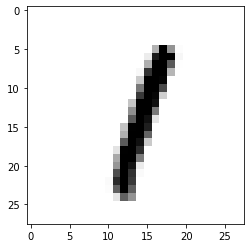

In [26]:
# Ahora vamos a predecir el número de una imagen de test.
# Numero de imagen que vamos a usar, será 5. Y la mostramos antes de nada
image = 5
# Para que se visualice hay que usarl el modelo de original sin transformar
plt.imshow(x_test_orig[image], cmap=plt.cm.binary)

In [27]:
# Le pasamos al modelo los datos que se usarán para la predicción. Que es el transformado
prediction = model.predict(x_test)

# el np.argmax nos dice el índice del vector que tiene la posición más alta. 
# La salida de la red es una matriz de 10 columnas. Donde en cada una de ellas contendrá 0 o 1
# según la predicción del modelo.
print("Número que se predice: ", np.argmax(prediction[image]) )

Model prediction:  1
